#PROJECT: HEART DISEASE PREDICTIONS
PROBLEM DEFINATION
Heart diseases are the one of the main causes of death worldwide,there are so many heart related diseses if we can pridect them early we can treat them and improve patient health by treatment and change in life style and habits

WHY THIS PROBLEM
The ability to pridict heart disease early can prevent a person from severe complications and even save his live ,Current diagnostic methods often rely on extensive medical evaluations, which can be time-consuming and costly,A machine learing-based apporch offers an automated and accessible providers by identifying individuals who might have higher risk ,by this we foucs the attenction on those in need of immediate care

Your Approach
For predicting heart diseases in this project, both the K-Nearest Neighbors (KNN) algorithm and the Decision Tree algorithm were used. KNN was a natural fit because it is simple to understand, easy to implement and effective with the data as it makes no assumptions of linear separability and is capable of capturing more complex relationships with relatively moderate tuning. On the other hand, Decision trees are intuitive, able to handle both numerical and categorical data types and therefore are good together with dataset to capture non-linear relationships in the data. The dataset for this project was downloaded from the Kaggle platform (Heart disease UCI dataset) and I applied Machine Learning techniques to determine the chances of an individual having any heart disease.

<H1>CODE :</H1>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score

<ol>

<li>seaborn is used for high-level interface for drawing attractive and informative statistical graphics.</li>
<li>train_test_split used to for spliting data for traing</li>
<li>cross_val_score for cross-validation </li>
</ol>

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.shape

(1025, 14)

In [ ]:
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


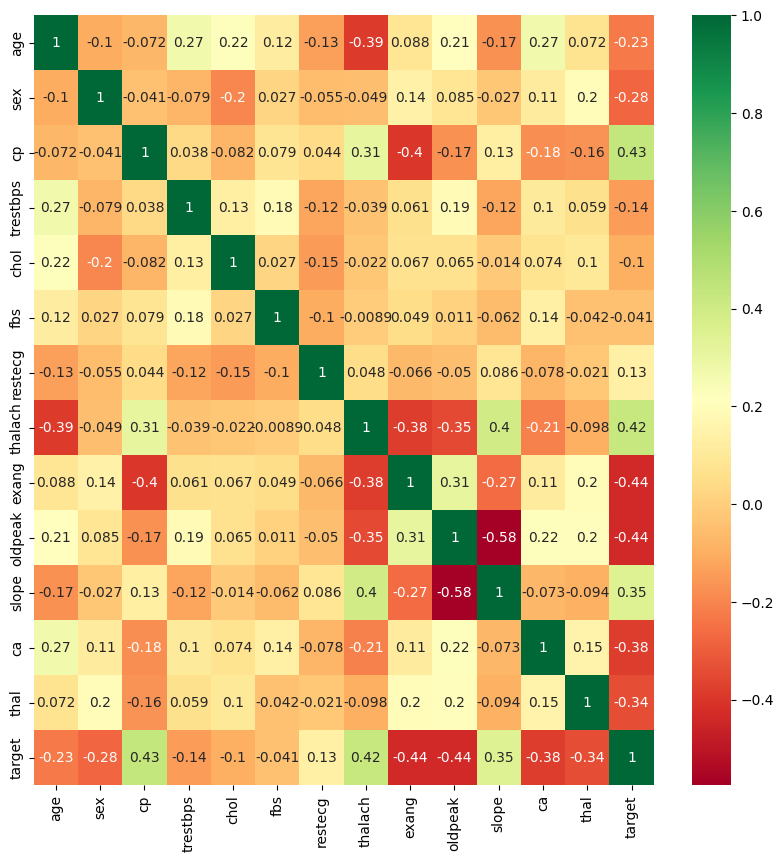

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

1.   df.corr() get correlations of each features in dataset
2. corrmat.index has the indexs of the correlation matrix, which contains the names of the features (columns).
3. The figsize=(20, 20) argument sets the size of the figure to 20 inches by 20 inches.
4. g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
  *   sns.heatmap() creats maps usinf seaboron
  *  df[top_corr_features].corr() give the co-relation for selected features
  * annot=True adds the correlation coefficient values directly onto the heatmap cells, allowing for easier interpretation of the correlations.
  * cmap="RdYlGn" specifies the colormap to use for the heatmap. "RdYlGn" is a red-yellow-green color map where red indicates strong negative correlations, yellow indicates no correlation, and green indicates strong positive correlations.







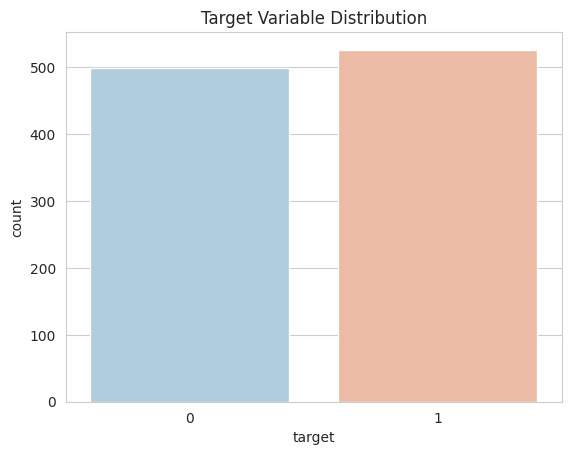

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df, hue='target', palette='RdBu_r', legend=False)
plt.title("Target Variable Distribution")
plt.show()



1.   sns.set_style() used to set overall style of graph
2.   sns.countplot() give count plot




<h3>Data Processing</h3>
 <p>After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.</p>

In [ ]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

<ol>
<li>A StandardScaler object is created to standardize the dataset.</li>
<li>Standardization adjusts the features to have a mean of 0 and a standard deviation of 1.</li>
<li>columns_to_scale lists the specific columns to be scaled.</li>
<li>fit_transform scales these selected columns in the dataset.</li>
<li>The scaled values replace the original data in the specified columns.</li>

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


<H1>KNN CLASSIFICATION</H1>

In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

1. here we assigns target(what we want to predict ) to y is the dependent variable (output).
2. X is the independent variable (input features) used to make predictions.



In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10,scoring='precision')
    knn_scores.append(score.mean())

1.   here we imported cross_val_score for crossvalidation
2.   here we check for k=1 to k=20
3.   here cv=10 repersents that we are doing 10 fold cross
     validation
4.   here score.mean() gives the mean accuracy score for k



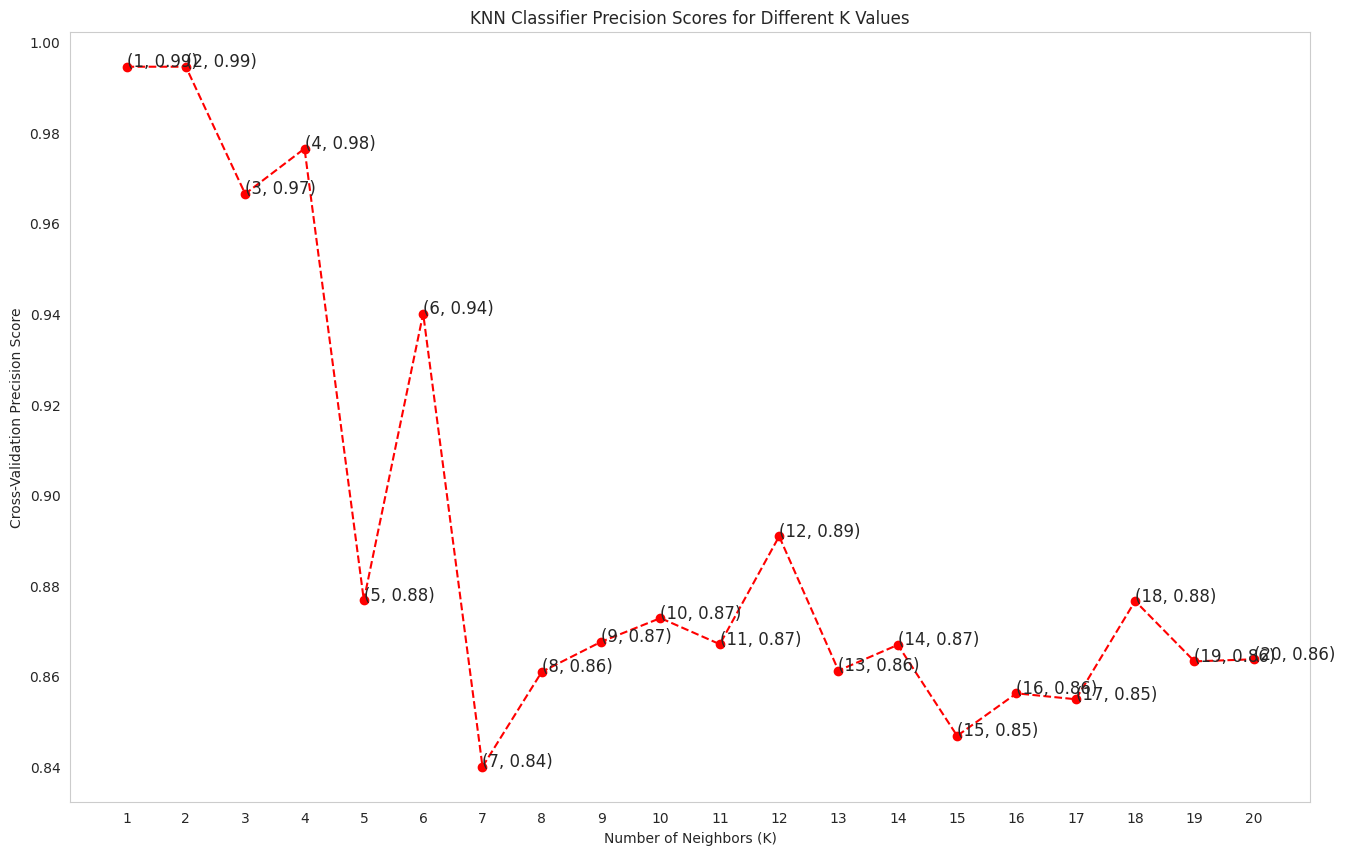

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(range(1, 21), knn_scores, color='red', marker='o', linestyle='dashed')
for i in range(1, 21):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1], 2)), fontsize=12)

plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Precision Score')
plt.title('KNN Classifier Precision Scores for Different K Values')
plt.grid()
plt.show()

In [ ]:
cv_scores = knn_scores
k_values = list(range(1, 21))
best_k = k_values[np.argmax(cv_scores)]

print(f"The optimal k value is {best_k} with Precision score {max(cv_scores):.2f}")

The optimal k value is 1 with Precision score 0.99


In [ ]:
optimal_k = 7
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)

Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Train the model

In [ ]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Predict on the test set

In [ ]:
y_pred = knn_classifier.predict(X_test)

Calculate accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")

precision = precision_score(y_test, y_pred)
print(f"Model Precision on Test Set: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall*100:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1*100:.2f}")

Model Accuracy on Test Set: 84.88%
Model Precision on Test Set: 83.18%
Recall: 87.25
F1 Score: 85.17


 Plot predictions vs. actual values

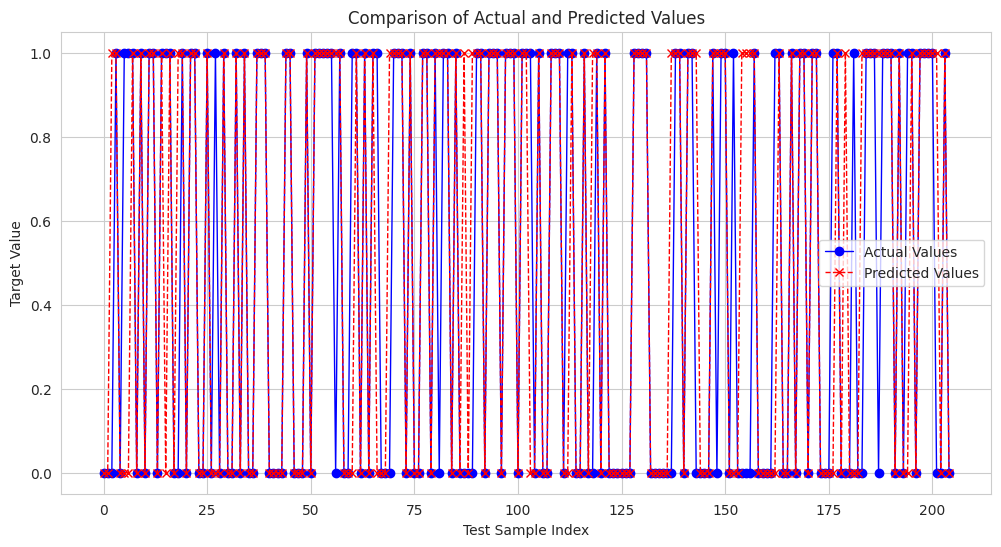

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', marker='o', linestyle='-', linewidth=1)
plt.plot(y_pred, label='Predicted Values', color='red', marker='x', linestyle='--', linewidth=1)
plt.xlabel('Test Sample Index')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [ ]:
score.mean()

0.863728090788387

<h1>DECISION TREE CLASSIFICATION

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Initialize the Decision Tree classifier

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()

Train the model

In [ ]:
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Predict on the test set

In [ ]:
y_pred = decision_tree_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy on Test Set: {accuracy * 100:.2f}%")
print(f"Model Precision on Test Set: {precision * 100:.2f}%")
print(f"Recall: {recall*100:.2f}")
print(f"F1 Score: {f1*100:.2f}")

Model Accuracy on Test Set: 98.05%
Model Precision on Test Set: 96.43%
Recall: 100.00
F1 Score: 98.18


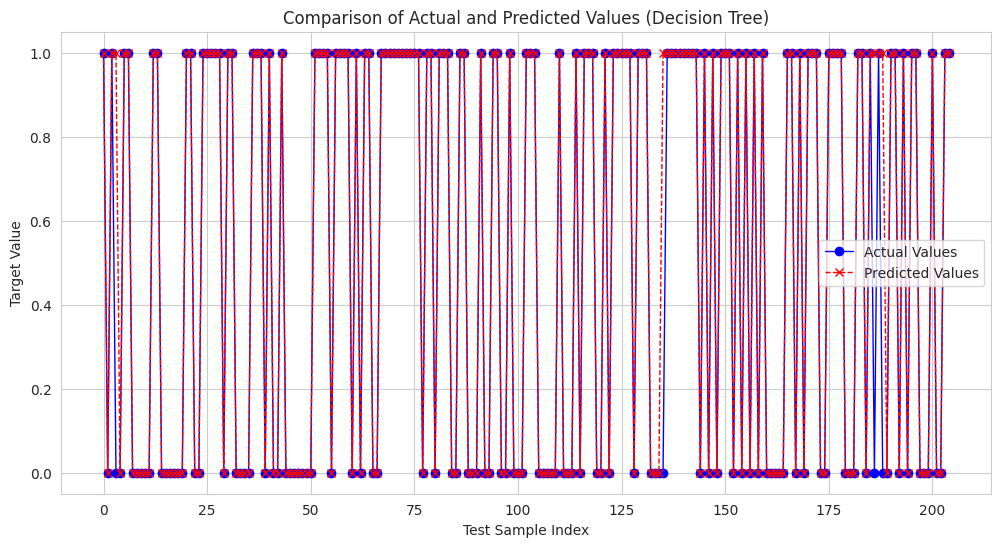

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', marker='o', linestyle='-', linewidth=1)
plt.plot(y_pred, label='Predicted Values', color='red', marker='x', linestyle='--', linewidth=1)
plt.xlabel('Test Sample Index')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values (Decision Tree)')
plt.legend()
plt.show()